In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [50]:
merged_data = pd.read_excel("final_data.xlsx")

In [51]:
keep_columns=['Open','High','Low','Volume','Subjectivity','Polarity','Compound']    

In [52]:
all_input_values=merged_data[keep_columns].values #numpy array.

In [53]:
model_input=[]
count_day=5
pred_day_count=1

j=0
temp=[]
for i in range(0,len(all_input_values)-5):
    temp=all_input_values[i:i+count_day]
    model_input.append(temp)


print(len(model_input))  
print("-------------")
print(model_input[1])
print("-------------")
print(model_input[2])

741
-------------
[[3.06100006e+02 3.15130005e+02 2.98799988e+02 1.16586480e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.07000000e+02 3.09399994e+02 2.97380005e+02 6.96518400e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.06000000e+02 3.18000000e+02 3.02730011e+02 7.39411600e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.21720001e+02 3.36739990e+02 3.17750793e+02 7.55122500e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.41959991e+02 3.44010010e+02 3.27019989e+02 7.00851600e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]]
-------------
[[3.07000000e+02 3.09399994e+02 2.97380005e+02 6.96518400e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.06000000e+02 3.18000000e+02 3.02730011e+02 7.39411600e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.21720001e+02 3.36739990e+02 3.17750793e+02 7.55122500e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.41959991e+02 3.44010010e+02 3.27019989e+02 7.00851600e+06
  5.00000000e-01 0.000000

In [54]:
model_input=np.array(model_input)
print(model_input.shape)

(741, 5, 7)


In [55]:
all_close_values = merged_data['Close'].values

In [56]:
model_close_values=[]
for i in range(5,len(all_close_values)):
    model_close_values.append(all_close_values[i])

In [57]:
model_close_values=np.array(model_close_values)
print(model_close_values.shape)

print(model_input.shape)

(741,)
(741, 5, 7)


In [58]:
training_size=int(len(model_input)*0.75)
test_size=len(model_input)-training_size
all_input_values_train, all_input_values_test=model_input[0:training_size,:],model_input[training_size:len(model_input),:]

training_size=int(len(model_close_values)*0.75)
all_close_values_train, all_close_values_test = model_close_values[0:training_size], model_close_values[training_size:len(model_close_values)]

In [59]:
all_close_values_train[0:5]

array([335.350006, 338.529999, 344.970001, 347.26001 , 334.399994])

In [60]:
all_close_values_train=np.array(all_close_values_train)
all_close_values_test=np.array(all_close_values_test)

In [61]:
all_input_values_train[0:2]

array([[[3.37790009e+02, 3.39209991e+02, 3.25260010e+02, 6.30233800e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.06100006e+02, 3.15130005e+02, 2.98799988e+02, 1.16586480e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.07000000e+02, 3.09399994e+02, 2.97380005e+02, 6.96518400e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.06000000e+02, 3.18000000e+02, 3.02730011e+02, 7.39411600e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.21720001e+02, 3.36739990e+02, 3.17750793e+02, 7.55122500e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00]],

       [[3.06100006e+02, 3.15130005e+02, 2.98799988e+02, 1.16586480e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.07000000e+02, 3.09399994e+02, 2.97380005e+02, 6.96518400e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.06000000e+02, 3.18000000e+02, 3.02730011e+02, 7.39411600e+06,
        

In [62]:
print(all_input_values_train.shape, all_input_values_test.shape, all_close_values_train.shape, all_close_values_test.shape)

(555, 5, 7) (186, 5, 7) (555,) (186,)


In [63]:
all_close_values_train.shape

(555,)

In [64]:
all_input_values_train=np.reshape(all_input_values_train,(555,35))
print(all_input_values_train.shape)

(555, 35)


In [65]:
all_input_values_test=np.reshape(all_input_values_test,(186,35))
print(all_input_values_test.shape)

(186, 35)


In [66]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
all_input_values_train=scaler.fit_transform(all_input_values_train) # hem fit ediyor hem de scale ediyor
all_input_values_test=scaler.transform(all_input_values_test) # sadece transform olacak. cünkü model bu veriyi eğitim esnasında görmeyecek 


In [67]:
all_close_values_train = np.array([all_close_values_train]).T
all_close_values_test = np.array([all_close_values_test]).T

In [68]:
print(all_input_values_train.shape, all_input_values_test.shape, all_close_values_train.shape, all_close_values_test.shape)

(555, 35) (186, 35) (555, 1) (186, 1)


In [69]:
scaler2 = StandardScaler()
all_close_values_train = scaler2.fit_transform(all_close_values_train)
all_close_values_test = scaler2.transform(all_close_values_test)

In [70]:
timestep=5
all_input_values_train = all_input_values_train.reshape((len(all_input_values_train),timestep,7))
all_input_values_test = all_input_values_test.reshape((len(all_input_values_test),timestep,7))

In [71]:
all_close_values_train.shape

(555, 1)

In [72]:
all_close_values_test.shape

(186, 1)

In [73]:
all_input_values_train.shape

(555, 5, 7)

In [74]:
all_input_values_test.shape

(186, 5, 7)

In [75]:
model=Sequential()
model.add(LSTM(units = 50, input_shape = (all_input_values_train.shape[1],all_input_values_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(LSTM(units=50))
model.add(Dense(units = 1))

In [76]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [77]:
model.fit(all_input_values_train, all_close_values_train, epochs=100,batch_size=8,verbose=1)

Epoch 1/100
70/70 [==============================] - 5s 8ms/step - loss: 0.7841
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4222
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3030
Epoch 4/100
70/70 [==============================] - 1s 7ms/step - loss: 0.2398
Epoch 5/100
70/70 [==============================] - 1s 8ms/step - loss: 0.2042
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 0.1760
Epoch 7/100
70/70 [==============================] - 0s 7ms/step - loss: 0.1625
Epoch 8/100
70/70 [==============================] - 0s 6ms/step - loss: 0.1459
Epoch 9/100
70/70 [==============================] - 0s 6ms/step - loss: 0.1329
Epoch 10/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1209
Epoch 11/100
70/70 [==============================] - 0s 6ms/step - loss: 0.1160
Epoch 12/100
70/70 [==============================] - 0s 7ms/step - loss: 0.1059
Epoch 13/100
70/70 [=================

In [78]:
train_predict=model.predict(all_input_values_train)
test_predict=model.predict(all_input_values_test)

#train_predict = train_predict.reshape((train_predict.shape[0],5,1))
#test_predict = test_predict.reshape((test_predict.shape[0],5,1))

# print('all_close_values_train shape: ', all_close_values_train.shape, '\nall_close_values_train', all_close_values_train[0:5], '\n')
# print('all_close_values_train_predict shape: ', train_predict.shape, '\nall_close_values_train_pred', train_predict[0:5], '\n')
# print('all_close_values_test shape: ', all_close_values_test.shape, '\nall_close_values_test', all_close_values_test[0:5], '\n')
# print('all_close_values_test_pred shape: ', test_predict.shape, '\nall_close_values_test_pred', test_predict[0:5])

print('all_close_values_train shape: ', all_close_values_train.shape)
print('all_close_values_train_predict shape: ', train_predict.shape)

print('all_close_values_test shape: ', all_close_values_test.shape)
print('all_close_values_test_pred shape: ', test_predict.shape)


all_close_values_train shape:  (555, 1)
all_close_values_train_predict shape:  (555, 5, 1)
all_close_values_test shape:  (186, 1)
all_close_values_test_pred shape:  (186, 5, 1)


In [79]:
print(all_close_values_test[0])
print(all_close_values_test[1])
print(test_predict[0])
print(test_predict[1])
print(test_predict[2])

[1.57033681]
[1.40670355]
[[1.5896468]
 [1.4711261]
 [1.493459 ]
 [1.3841708]
 [1.5515563]]
[[1.517962 ]
 [1.4793425]
 [1.3734081]
 [1.5422199]
 [1.4928136]]
[[1.5184169]
 [1.3656683]
 [1.5317566]
 [1.4853244]
 [1.4308395]]


In [80]:
test_predict = test_predict.reshape((test_predict.shape[0],5))

In [81]:
train_predict = train_predict.reshape((train_predict.shape[0],5))

In [82]:
test_predict = scaler2.inverse_transform(test_predict)
train_predict = scaler2.inverse_transform(train_predict)

In [83]:
train_predict.shape

(555, 5)

In [84]:
#test_predict=test_predict.reshape((test_predict.shape[0]*test_predict.shape[1],1))

In [85]:
test_predict.shape

(186, 5)

In [86]:
# Preditct 186, 5, 1 döndü, 186 5'e reshape edildi ve son elemanlar seçilerek 186,1 elde edildi
# temp_predict=[]
# for i in range(test_predict.shape[0]):
#     temp_predict.append(test_predict[i][4])

# test_predict=np.array(temp_predict)
# print(test_predict.shape)

# temp_train_predict=[]
# for i in range(train_predict.shape[0]):
#     temp_train_predict.append(train_predict[i][4])

# train_predict=np.array(temp_train_predict)
# print(train_predict.shape)

In [87]:
# Preditct 186, 5, 1 döndü, 186 5'e reshape edildi ve 5 elemanın ortalaması alınarak 186,1 elde edildi
temp_predict=[]
close_average=0
for i in range(test_predict.shape[0]):
    for j in range(5):
        close_average+=test_predict[i][j]
    temp_predict.append(close_average/5)
    close_average=0

test_predict=np.array(temp_predict)
print(test_predict.shape)


temp_train_predict=[]
close_average=0
for i in range(train_predict.shape[0]):
    for j in range(5):
        close_average+=train_predict[i][j]
    temp_train_predict.append(close_average/5)
    close_average=0
train_predict=np.array(temp_train_predict)
print(train_predict.shape)

(186,)
(555,)


In [88]:
train_predict = np.array([train_predict]).T
test_predict = np.array([test_predict]).T

In [89]:
all_close_values_test=np.array(all_close_values_test)
print(all_close_values_test.shape)

(186, 1)


In [90]:
train_predict[1]

array([321.36773682])

In [91]:
all_close_values_train = scaler2.inverse_transform(all_close_values_train)
all_close_values_test = scaler2.inverse_transform(all_close_values_test)

In [92]:
mape_test = mean_absolute_percentage_error(all_close_values_test, temp_predict)
mape_train = mean_absolute_percentage_error(all_close_values_train, temp_train_predict)
print(mape_test)
print(mape_train)

0.07463908821815742
0.0743249261973458


In [93]:
rmse = np.sqrt(mean_squared_error(all_close_values_test, test_predict))
print(rmse)

91.62090625721461


In [94]:
train_predict=np.array(train_predict)
train_predict.shape

(555, 1)

In [95]:
test=all_close_values[5:]
train_predict[1]

array([321.36773682])

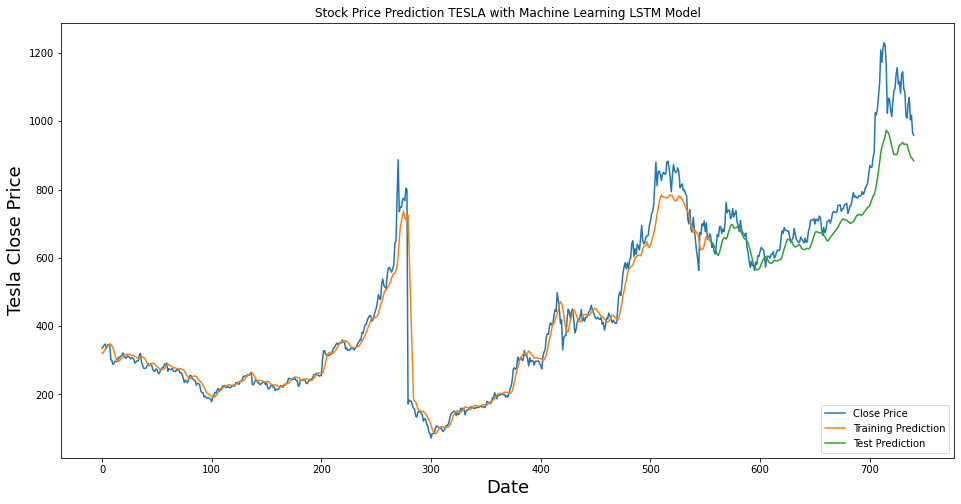

In [96]:
#look_back = 7
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction TESLA with Machine Learning LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tesla Close Price', fontsize=18)
plt.plot(model_close_values)
plt.plot(train_predict)
plt.plot(np.arange(len(test_predict)) + len(all_close_values_train), test_predict)
plt.legend(['Close Price', 'Training Prediction', 'Test Prediction'], loc='lower right')
plt.show() 